In [ ]:
# loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import colorcet as cc

In [ ]:
# loading dhe data
Brain = pd.read_csv("(only mammals) including whole brain data 03 03 2024.csv")
# Brain = Brain.drop(['Unnamed: 0'], axis=1)
Brain.head(8)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,"5,080,000","47,984,000","58,580,000",11.5
2,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,"5,632,000","25,324,000","34,958,000",5.4
3,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,"6,039,000","59,651,000","69,763,000",13.7
4,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,"6,116,000","44,447,000","55,659,000",11.6
5,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,"6,150,000","15,740,000","26,880,000",35.3
6,Commerson's roundleaf bat,Chiroptera,Hipposideridae,0.2430,0.1070,0.588,"7,877,000","51,875,000","66,719,000",101.9
7,Smoky shrew,Eulipotyphla,Soricidae,0.0840,0.0200,0.176,"9,730,000","20,870,000","36,460,000",7.5


In [ ]:
# Dropping NaN values
Brain = Brain.dropna().reset_index(drop=True)

In [ ]:
# Converting into float and removing commas
if Brain['Forebrain n'].dtype != 'float64':
     Brain['Forebrain n'] = Brain['Forebrain n'].str.replace(',', '').astype(float)
if Brain['Cerebellum n'].dtype != 'float64':
     Brain['Cerebellum n'] = Brain['Cerebellum n'].str.replace(',', '').astype(float)
if Brain['Whole brain n'].dtype != 'float64':
     Brain['Whole brain n'] = Brain['Whole brain n'].str.replace(',', '').astype(float)

In [ ]:
# Getting relative cortical and cerebellar masses and relative number of neurons in each structure
Brain['Forebrain m r %'] = Brain['Forebrain m']/Brain['Whole brain m']*100
Brain['Cerebellum m r %'] = Brain['Cerebellum m']/Brain['Whole brain m']*100
Brain['Forebrain n r %'] = Brain['Forebrain n']/Brain['Whole brain n']*100
Brain['Cerebellum n r %'] = Brain['Cerebellum n']/Brain['Whole brain n']*100

In [ ]:
# Getting neuron densities in a miligram of structure
Brain['Forebrain n d'] = Brain['Forebrain n']/(Brain['Forebrain m']*1000)
Brain['Cerebellum n d'] = Brain['Cerebellum n']/(Brain['Cerebellum m']*1000)
Brain['Whole brain n d'] = Brain['Whole brain n']/(Brain['Whole brain m']*1000)

In [ ]:
# Brain mass per body mass
Brain['Forebrain m per body m'] = Brain['Forebrain m']/Brain['Body m']*100
Brain['Cerebellum m per body m'] = Brain['Cerebellum m']/Brain['Body m']*100
Brain['Whole brain m per body m'] = Brain['Whole brain m']/Brain['Body m']*100

In [ ]:
# Number of neurons per body mass
Brain['Forebrain n per body m'] = Brain['Forebrain n']/Brain['Body m']
Brain['Cerebellum n per body m'] = Brain['Cerebellum n']/Brain['Body m']
Brain['Whole brain n per body m'] = Brain['Whole brain n']/Brain['Body m']

In [ ]:
# Cortex/rest of brain and cerebellum/rest of brain
Brain['Forebrain m/Rest m'] = Brain['Forebrain m']/(Brain['Whole brain m']-Brain['Forebrain m']-Brain['Cerebellum m'])
Brain['Cerebellum m/Rest m'] = Brain['Cerebellum m']/(Brain['Whole brain m']-Brain['Forebrain m']-Brain['Cerebellum m'])

In [ ]:
Breng = Brain
Breng.head()

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,...,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m,Forebrain m/Rest m,Cerebellum m/Rest m
0,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,5080000.0,47984000.0,58580000.0,11.5,...,888592.592593,240081.967213,0.781739,0.469565,2.121739,4.417391e+05,4.172522e+06,5.093913e+06,0.898102,0.539461
1,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,5632000.0,25324000.0,34958000.0,5.4,...,703444.444444,168067.307692,1.555556,0.666667,3.851852,1.042963e+06,4.689630e+06,6.473704e+06,0.954545,0.409091
2,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,6039000.0,59651000.0,69763000.0,13.7,...,828486.111111,277940.239044,0.678832,0.525547,1.832117,4.408029e+05,4.354088e+06,5.092190e+06,1.081395,0.837209
3,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,6116000.0,44447000.0,55659000.0,11.6,...,916432.989691,254150.684932,0.739655,0.418103,1.887931,5.272414e+05,3.831638e+06,4.798190e+06,1.012987,0.572609
4,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,6150000.0,15740000.0,26880000.0,35.3,...,327916.666667,68571.428571,0.521246,0.135977,1.110482,1.742210e+05,4.458924e+05,7.614731e+05,1.150000,0.300000


In [ ]:
Breng.describe()

,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,Forebrain m r %,Cerebellum m r %,Forebrain n r %,...,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m,Forebrain m/Rest m,Cerebellum m/Rest m
count,93.000000,93.000000,93.000000,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000,...,9.300000e+01,93.000000,93.000000,93.000000,93.000000,9.300000e+01,9.300000e+01,9.300000e+01,93.000000,93.000000
mean,116.481663,28.384414,166.880505,7.098237e+08,6.613180e+09,7.400044e+09,1.807794e+05,55.094800,13.771869,17.466136,...,4.377502e+05,83568.386623,0.554925,0.151385,1.055516,2.035206e+05,8.530601e+05,1.161260e+06,2.464562,0.532401
std,422.119925,134.205781,621.031602,2.180229e+09,2.960656e+10,3.115189e+10,9.436925e+05,14.956460,3.695958,7.344669,...,2.144966e+05,53505.479952,0.505966,0.145107,0.878824,2.762514e+05,1.066379e+06,1.422510e+06,1.948290,0.311409
min,0.084000,0.020000,0.176000,5.080000e+06,1.574000e+07,2.688000e+07,5.400000e+00,21.529412,8.662211,2.175926,...,1.272029e+05,16004.040931,0.027160,0.005546,0.036212,4.178667e+02,7.228800e+03,7.662933e+03,0.335165,0.194271
25%,0.446000,0.188000,1.240000,2.127000e+07,1.097500e+08,1.499800e+08,1.019000e+02,47.647648,11.010807,12.192765,...,2.704539e+05,44837.714354,0.201963,0.039597,0.368182,3.177601e+04,1.307591e+05,1.666190e+05,1.272277,0.351734
50%,5.228000,1.196000,9.132000,9.896000e+07,3.609290e+08,4.942000e+08,1.150000e+03,56.181818,13.676149,16.532118,...,4.105714e+05,74498.505264,0.408000,0.106329,0.893795,8.691441e+04,4.457143e+05,5.668724e+05,1.816000,0.448176
75%,40.194000,6.632000,62.724000,4.715000e+08,1.969000e+09,2.640000e+09,1.206600e+04,65.406275,15.462111,20.562140,...,5.670426e+05,109553.364269,0.729086,0.180301,1.337614,2.510400e+05,1.112759e+06,1.514644e+06,2.730599,0.558140
max,2847.000000,1171.000000,4618.000000,1.634000e+10,2.507000e+11,2.570400e+11,7.500000e+06,81.697613,28.685259,44.074567,...,1.043500e+06,277940.239044,2.232649,0.666667,3.851852,1.448649e+06,4.689630e+06,6.473704e+06,10.100016,1.951667


In [ ]:
Breng.shape

(93, 25)

In [ ]:
pd.set_option('display.max_rows', 170, 'display.max_columns', 50)
Breng.head(170)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,Forebrain m r %,Cerebellum m r %,Forebrain n r %,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m,Forebrain m/Rest m,Cerebellum m/Rest m
0,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,5.080000e+06,4.798400e+07,5.858000e+07,11.50,36.844262,22.131148,8.671902,81.911915,56507.230256,8.885926e+05,240081.967213,0.781739,0.469565,2.121739,4.417391e+05,4.172522e+06,5.093913e+06,0.898102,0.539461
1,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,5.632000e+06,2.532400e+07,3.495800e+07,5.40,40.384615,17.307692,16.110761,72.441215,67047.619048,7.034444e+05,168067.307692,1.555556,0.666667,3.851852,1.042963e+06,4.689630e+06,6.473704e+06,0.954545,0.409091
2,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,6.039000e+06,5.965100e+07,6.976300e+07,13.70,37.051793,28.685259,8.656451,85.505210,64935.483871,8.284861e+05,277940.239044,0.678832,0.525547,1.832117,4.408029e+05,4.354088e+06,5.092190e+06,1.081395,0.837209
3,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,6.116000e+06,4.444700e+07,5.565900e+07,11.60,39.178082,22.146119,10.988340,79.855908,71282.051282,9.164330e+05,254150.684932,0.739655,0.418103,1.887931,5.272414e+05,3.831638e+06,4.798190e+06,1.012987,0.572609
4,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,6.150000e+06,1.574000e+07,2.688000e+07,35.30,46.938776,12.244898,22.879464,58.556548,33423.913043,3.279167e+05,68571.428571,0.521246,0.135977,1.110482,1.742210e+05,4.458924e+05,7.614731e+05,1.150000,0.300000
5,Commerson's roundleaf bat,Chiroptera,Hipposideridae,0.2430,0.1070,0.588,7.877000e+06,5.187500e+07,6.671900e+07,101.90,41.326531,18.197279,11.806232,77.751465,32415.637860,4.848131e+05,113467.687075,0.238469,0.105005,0.577036,7.730128e+04,5.090775e+05,6.547498e+05,1.021008,0.449580
6,Smoky shrew,Eulipotyphla,Soricidae,0.0840,0.0200,0.176,9.730000e+06,2.087000e+07,3.646000e+07,7.50,47.727273,11.363636,26.686780,57.240812,115833.333333,1.043500e+06,207159.090909,1.120000,0.266667,2.346667,1.297333e+06,2.782667e+06,4.861333e+06,1.166667,0.277778
7,Ansell's mole-rat,Rodentia,Bathyergidae,0.2910,0.2000,1.250,9.730000e+06,7.544000e+07,1.028200e+08,93.45,23.280000,16.000000,9.463139,73.370940,33436.426117,3.772000e+05,82256.000000,0.311396,0.214018,1.337614,1.041199e+05,8.072766e+05,1.100268e+06,0.383399,0.263505
8,Heart-nosed bat,Chiroptera,Megadermatidae,0.2570,0.1030,0.562,1.022100e+07,6.379200e+07,8.133100e+07,26.00,45.729537,18.327402,12.567164,78.435037,39770.428016,6.193398e+05,144717.081851,0.988462,0.396154,2.161538,3.931154e+05,2.453538e+06,3.128115e+06,1.272277,0.509901
9,Short-palated fruit bat,Chiroptera,Pteropodidae,0.4610,0.1270,0.892,1.047100e+07,7.744500e+07,9.901600e+07,27.00,51.681614,14.237668,10.575059,78.214632,22713.665944,6.098031e+05,111004.484305,1.707407,0.470370,3.303704,3.878148e+05,2.868333e+06,3.667259e+06,1.516447,0.417763


In [ ]:
X00 = Breng['Forebrain m']
Y00 = Breng["Forebrain n"]

In [ ]:
# The correlation between Forebrain mass and number of neurons
r0 = np.corrcoef(X00, Y00)
r0

array([[1.        , 0.70626704],
       [0.70626704, 1.        ]])

In [ ]:
X01 = Breng['Cerebellum m']
Y01 = Breng["Cerebellum n"]

In [ ]:
# The same for cerebellum
r1 = np.corrcoef(X01, Y01)
r1

array([[1.        , 0.97658319],
       [0.97658319, 1.        ]])

In [ ]:
X02 = Breng['Forebrain m r %']
Y02 = Breng["Forebrain n r %"]

In [ ]:
# The correlation between relative cortical mass and relative number of neurons
r2 = np.corrcoef(X02, Y02)
r2

array([[1.        , 0.40340812],
       [0.40340812, 1.        ]])

In [ ]:
X03 = Breng['Cerebellum m r %']
Y03 = Breng["Cerebellum n r %"]

In [ ]:
# Same as above for cerebellum
r3 = np.corrcoef(X03, Y03)
r3

array([[1.       , 0.4419812],
       [0.4419812, 1.       ]])

In [ ]:
Y04 = Breng["Body m"]

In [ ]:
# Correlation between body mass and number of neurons in the cortex
r4 = np.corrcoef(Y00, Y04)
r4

array([[1.        , 0.35806532],
       [0.35806532, 1.        ]])

In [ ]:
# Correlation between cerebellum and forebrain neuron densities
x05 = Breng['Forebrain n d']
y05 = Breng['Cerebellum n d']
r5 = np.corrcoef(x05, y05)
r5

array([[1.        , 0.80302951],
       [0.80302951, 1.        ]])

In [ ]:
# The correlation between Forebrain mass/Rest mass and Forebrain neuron density
x06 = Breng['Forebrain m/Rest m']
r6 = np.corrcoef(x06, x05)
r6

array([[ 1.       , -0.4673601],
       [-0.4673601,  1.       ]])

In [ ]:
# The correlation between cerebellum mass/Rest of brain masss and cerebellum neuron density
x07 = Breng['Cerebellum m/Rest m']
r7 = np.corrcoef(x07, y05)
r7

array([[ 1.        , -0.24127876],
       [-0.24127876,  1.        ]])

In [ ]:
# The correlation between Cerebral cortex mass/rest of brain mass and neuron count
r8 = np.corrcoef(x06, Y00)
r8

array([[1.        , 0.68008239],
       [0.68008239, 1.        ]])

In [ ]:
# The correlation between Cerebellum mass/rest of brain mass and neuron count
r9 = np.corrcoef(x07, Y01)
r9

array([[1.        , 0.71590545],
       [0.71590545, 1.        ]])

In [ ]:
x10 = Breng['Forebrain m r %']/Breng['Whole brain m']
r10 = np.corrcoef(Y00, x10)
r10

array([[ 1.       , -0.1836622],
       [-0.1836622,  1.       ]])

In [ ]:
r11 = np.corrcoef(x05, x10)
r11

array([[1.        , 0.71177782],
       [0.71177782, 1.        ]])

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

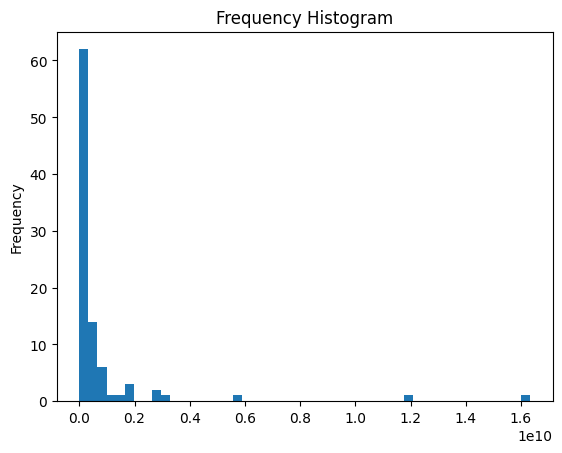

In [ ]:
plt.hist(Y00, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

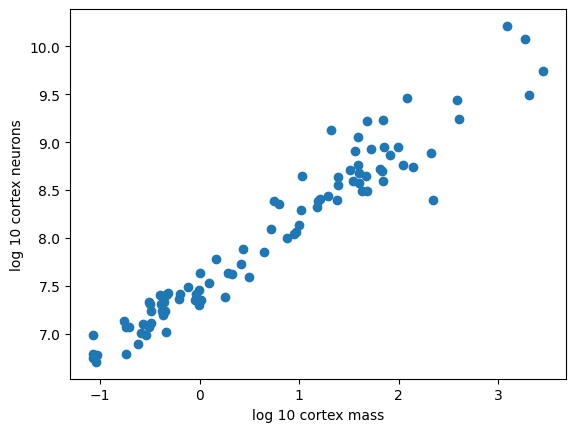

In [ ]:
plt.scatter(np.log10(X00), np.log10(Y00))
plt.xlabel('log 10 cortex mass')
plt.ylabel('log 10 cortex neurons')
plt.show()

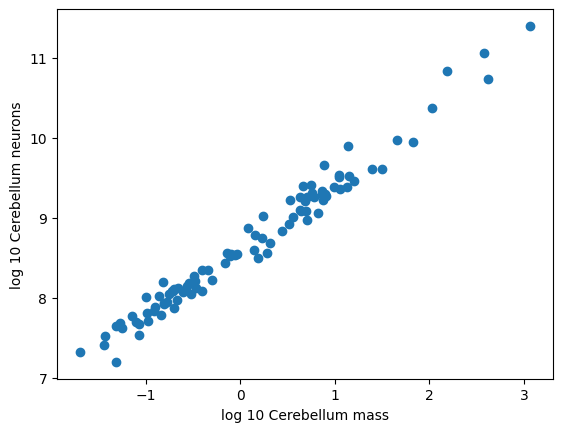

In [ ]:
plt.scatter(np.log10(X01), np.log10(Y01))
plt.xlabel('log 10 Cerebellum mass')
plt.ylabel('log 10 Cerebellum neurons')
plt.show()

<Axes: xlabel='Forebrain m', ylabel='Forebrain n'>

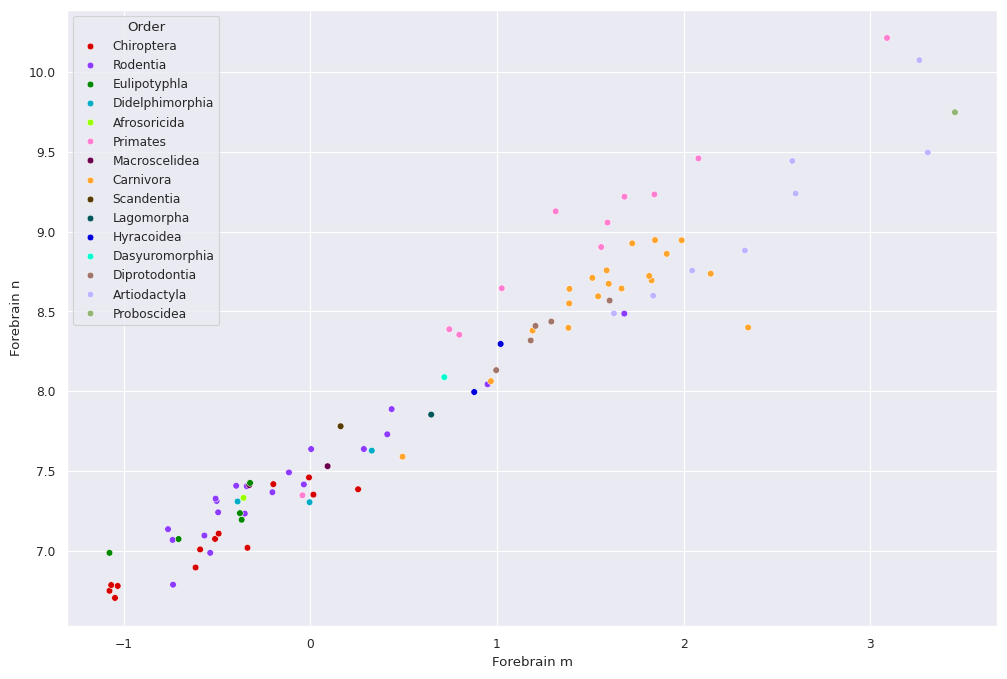

In [ ]:
sns.set("paper", rc={"figure.figsize": (12, 8)})
palette = sns.color_palette(cc.glasbey, n_colors=15)
sns.scatterplot(data=Breng, x=np.log10(X00), y=np.log10(Y00), hue='Order', palette=palette)

<Axes: xlabel='Forebrain m', ylabel='Forebrain n d'>

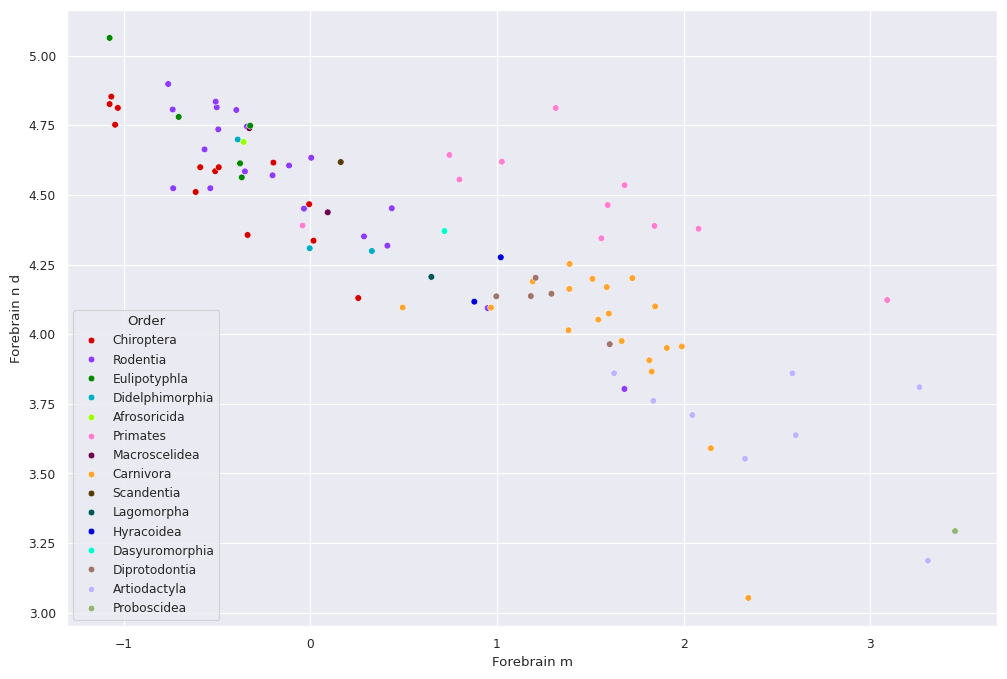

In [ ]:
sns.scatterplot(data=Breng, x=np.log10(X00), y=np.log10(x05), hue='Order', palette=palette)

In [ ]:
# Saving modified data
Breng.to_csv('/content/mammals with feature engineering 03 03 2024.csv')

In [ ]:
# Cetacean brain weights and some statistics
m = np.array([2843, 2700, 4900, 3750, 6716, 7085, 5284, 748, 763, 644, 2083, 765, 4305, 2750, 3000, 2700, 1030, 4166, 2893, 2387,
              2720, 2994, 632, 1012, 622, 1103, 1200, 1126, 1148, 886, 510, 1162, 6411, 1440, 1860, 1463, 2149, 2355, 2997, 422,
              468, 6500, 1392, 540, 597, 866, 8028, 295, 221, 4249, 688, 1247, 748, 666, 819, 660, 1542, 1824, 2004])
np.mean(m)

2187.762711864407

In [ ]:
np.std(m)

1894.8486486581082

<Axes: xlabel='Order', ylabel='Count'>

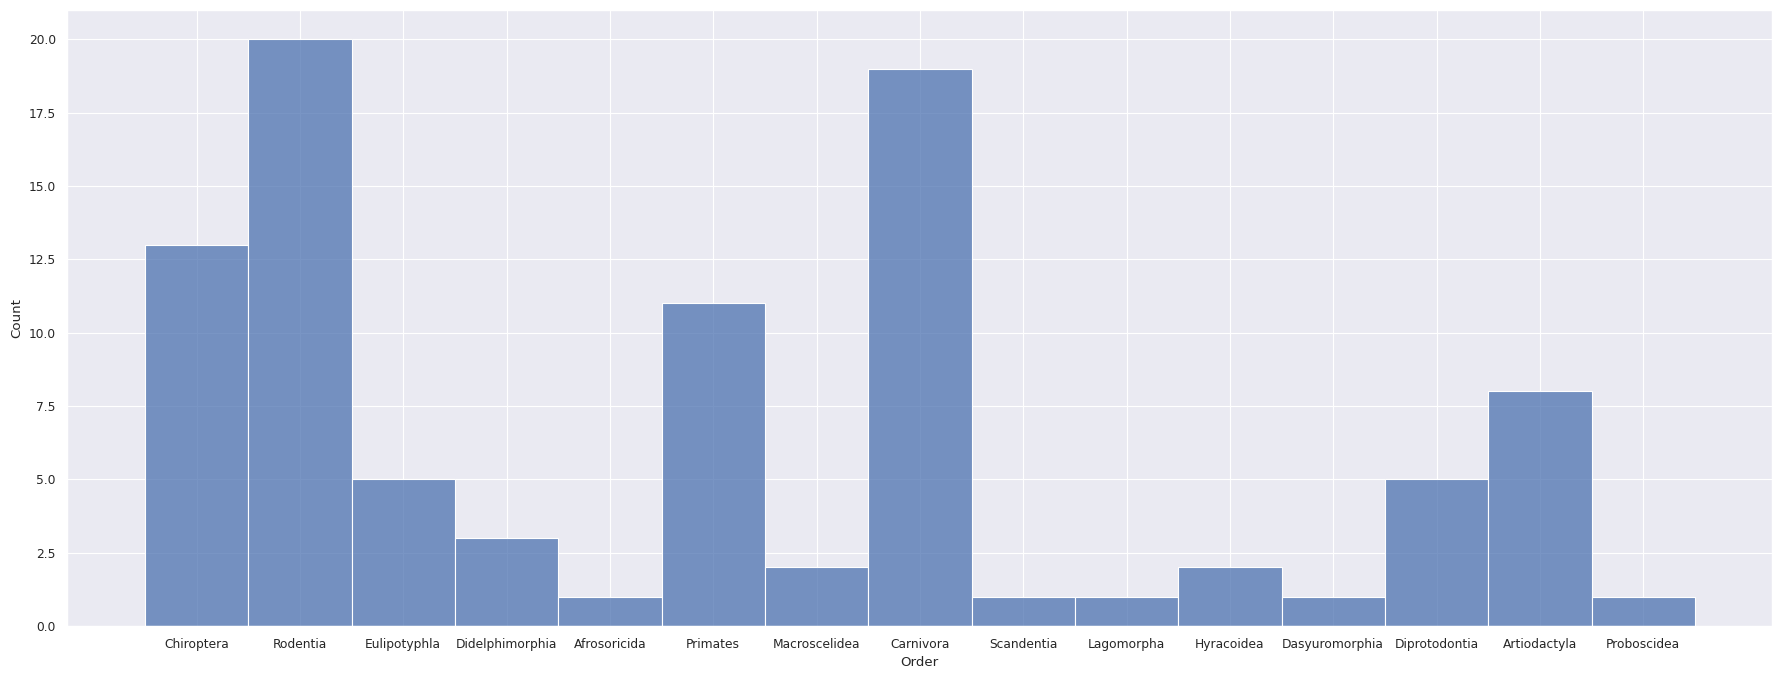

In [ ]:
sns.set("paper", rc={"figure.figsize": (22, 8)})
sns.histplot(data=Breng, x="Order")

In [ ]:
matrix = Breng.corr(numeric_only=True)

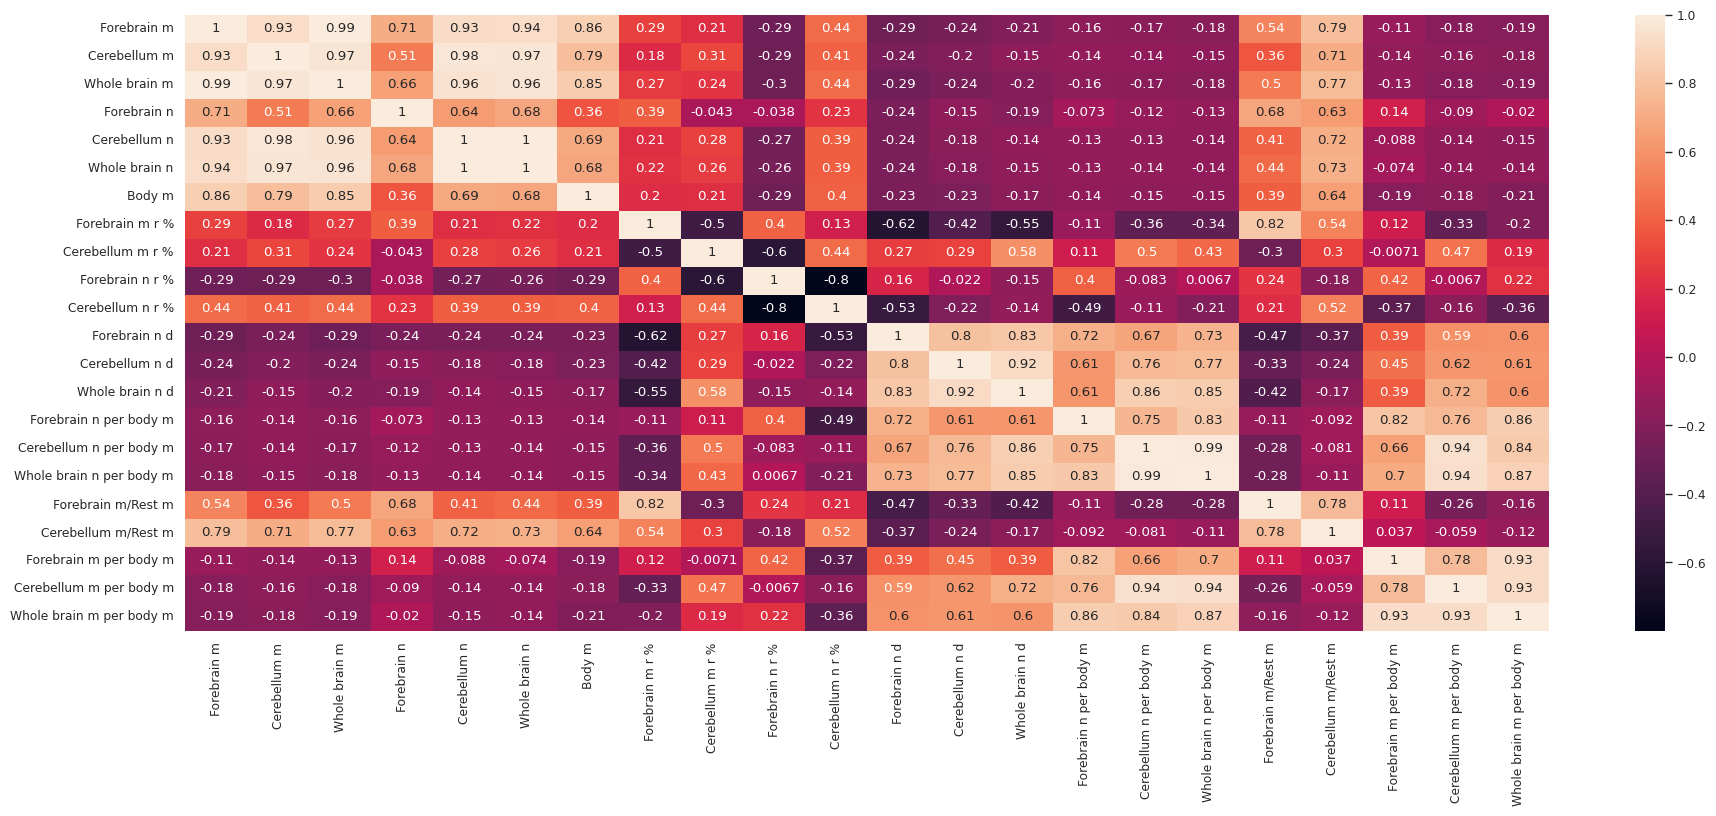

In [ ]:
sns.heatmap(matrix, annot=True);